# German Traffic Signs Detection  
## Cargo 2017

## GTSDB dataset analysis
GTSDB is German traffic signs dataset and can be downloaded from [GTSDB](http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset)

### 【可选1】、打印所有交通标记的信息，例如【单向行驶标记】有多少个图片

the top 3:
          img   x1   y1    x2   y2  id
0  00000.ppm  774  411   815  446  11
1  00001.ppm  983  388  1024  432  40
2  00001.ppm  386  494   442  552  38
the top 3 id:
 0    11
1    40
2    38
Name: id, dtype: int64
Train has image files with traffic signs numbers: 741
Train has traffic signs class numbers: 43
Train has traffic signs instance numbers: 1213
38    88
12    85
13    83
2     81
10    80
1     79
4     68
8     57
5     53
9     41
7     41
11    38
18    38
14    32
25    31
3     30
17    29
23    20
35    20
6     19
26    18
30    16
33    16
15    15
28    14
22    13
34    12
42    11
40    10
20     9
36     9
32     8
16     8
41     7
39     6
21     5
24     5
29     5
0      4
27     3
19     2
31     2
37     2
Name: id, dtype: int64


<AxesSubplot:>

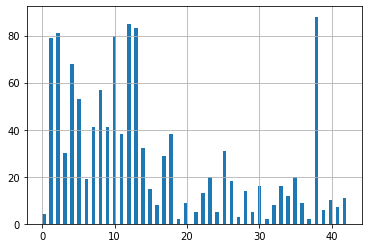

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

import os
os.getcwd()

# TrainIJCNN2013    '../data/TrainIJCNN2013/gt.txt'
#data = pd.read_csv('../data/TrainIJCNN2013/gt.txt', sep=";", header=None)

# FullIJCNN2013     '../data/FullIJCNN2013/gt.txt'
data = pd.read_csv('./data/FullIJCNN2013/gt.txt', sep=";", header=None)
data.columns = ["img", "x1", "y1", "x2", "y2", "id"]
#data=data[:3]

top3 = data[:3]
print("the top 3:\n", top3)
print("the top 3 id:\n", top3['id'])

# 741 张图片， 每张图片属于多个分类
print("Train has image files with traffic signs numbers:", len(data['img'].unique())) 

# 43 个分类
print("Train has traffic signs class numbers:", len(data['id'].unique()))

# 总共1213 条记录
print("Train has traffic signs instance numbers:", data['id'].count())

#pd.value_counts(data['id'], sort=False).plot.bar()
#打印每个分类的个数
print(pd.value_counts(data['id'], sort=True))
data['id'].hist(bins=86)

### 2、 将各个分类标记进行【训练/测试/校验】的随机分段

0.23.2
the top 3:
          img   x1   y1    x2   y2  id
0  00000.ppm  774  411   815  446  11
1  00001.ppm  983  388  1024  432  40
2  00001.ppm  386  494   442  552  38

shuffles count: 1213

train count: 849
 test count: 364

shuffles count: 370

train count: 185
 test count: 185

top 3 train:          img   x1   y1    x2   y2  id
0  00000.ppm  774  411   815  446  11
1  00001.ppm  983  388  1024  432  40
2  00001.ppm  386  494   442  552  38

top 3 test :          img   x1   y1   x2   y2  id
0  00575.ppm  403  474  435  506  38
1  00593.ppm  584  510  608  534  38
2  00599.ppm  700  454  722  476   9

top 3 val  :            img   x1   y1    x2   y2  id
185  00755.ppm  563  595   593  625  38
186  00756.ppm  881  524   931  574  12
187  00758.ppm  982  521  1014  553   8


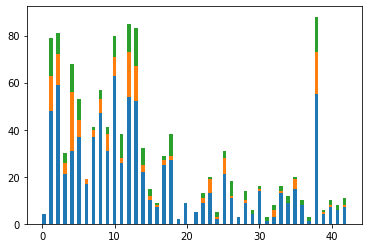

In [43]:
import pandas as pd
import numpy as np

%matplotlib inline

print(sklearn.__version__)

data = pd.read_csv('./data/FullIJCNN2013/gt.txt', sep=";", header=None)
data.columns = ["img", "x1", "y1", "x2", "y2", "id"]

top3 = data[:3]
print("the top 3:\n", top3)

def stratifiedshufflesplit(data, train_size, test_size, thres=1):
    if train_size != None:
        test_size = 1.0 - train_size
    elif test_size != None:
        train_size = 1.0 - test_size
    else:
        raise IndexError("错误的比率")
    
    if train_size < 0.0 or test_size < 0.0:
        raise IndexError("错误的比率")
    
     
    # 将分类只有一条记录的数据，拼接到尾部
    y_less = data.groupby("id").filter(lambda x: len(x) <= thres)
    data = pd.concat([data, y_less], ignore_index=True)
    
    # 类型对应所有数量
    idValueList = data['id']
    #print('\nid value list:\n', idValueList)
    
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    #print('\nthe kf is:\n', kf)
    
    shuffles = np.hstack((next(kf.split(idValueList))))
    print("\nshuffles count:", len(shuffles))
    
    train_count = int(idValueList.count() * train_size)
    test_count = idValueList.count() - train_count
    print("\ntrain count:", train_count)
    print(  " test count:", test_count)
    
    xtrain, xtest = data.iloc[0:train_count,:], data.iloc[train_count:,:]
    #print("\ntrains:", len(xtrain), xtrain)
    #print("\n tests:", len(xtest), xtest)
    
    return xtrain, xtest

xtrain, xt = stratifiedshufflesplit(data, train_size=0.7, test_size=0.3, thres=1)
xtest, xval = stratifiedshufflesplit(xt, 0.5, 0.5, 1)
print("\ntop 3 train:", xtrain.head(3))
print("\ntop 3 test :", xtest.head(3))
print("\ntop 3 val  :", xval.head(3))
 
plt.hist([
        xtrain['id'], 
        #xt['id'],
        xtest['id'], 
        xval['id']
        ], 
        stacked=True, 
        label=["train", "test", "val"],
        bins=86
    )

plt.show()

xtrain['width'] = 1360
xtrain['height'] = 800
xtest['width'] = 1360
xtest['height'] = 800
xval['width'] = 1360
xval['height'] = 800
  
xtrain.to_csv('./data/png_FullIJCNN2013/train.csv', index=False)
xtest.to_csv('./data/png_FullIJCNN2013/test.csv', index=False)
xval.to_csv('./data/png_FullIJCNN2013/val.csv', index=False)

### 3、 Create Record and copy test images
（注意：如果缺少gtsdb.label 文件，可以从根目录备份的gtsdb.txt 逆向手工产生）

In [2]:
import os
import hashlib
import io
import random
import tqdm
import shutil
import configparser
import pylab as plt
import tensorflow as tf
from tqdm import tqdm
from lxml import etree
from PIL import Image, ImageDraw, ImageFont
from object_detection.utils import dataset_util
from object_detection.utils import label_map_util
from collections import namedtuple, OrderedDict
import pandas as pd
from shutil import copyfile


def create_tf_record(examples_list, output_filename):
    print("Saving record file:", output_filename)
    writer = tf.compat.v1.python_io.TFRecordWriter(output_filename)
    for tf_example in examples_list:
        writer.write(tf_example.SerializeToString())
    writer.close()
    print("Successful created record files")

# 在图片 image 里绘制其对应的所有分类信息，包含框框 和 路标名字，并存储到png文件
def save_img_with_box(image, group, img_name, gt_label):
    for index, row in group.object.iterrows():
        x1 = row['x1']
        x2 = row['x2'] 
        y1 = row['y1'] 
        y2 = row['y2'] 
        class_id = int(row['id'])+1
        label = gt_label[class_id]
        
        box = (x1, y1), (x2, y2)
        #print(box, label, img_name)
        font = ImageFont.truetype(cf.get('font_path', 'Simsun'), 20)
        drawObject = ImageDraw.Draw(image)  
        drawObject.rectangle(box, outline = "red")  
        drawObject.text([x1+20, y1+20], label,"red", font=font)
    save_dir = target_dir
    if not os.path.exists(save_dir):
        os.makedirs(save_dir) 
    image.save(os.path.join(save_dir, img_name))
    #plt.imshow(image) 
    #plt.show()

def get_label_dict(label_path):
    label_map_dict = {}
    with open(label_path, 'r', encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            if not line.split():
                continue
            line = line.strip()
            number, name = line.split(' ', 1)
            #print(number, name)
            label_map_dict[int(number)] = name
    return label_map_dict

###########################################################
# img_path指定的图片，对应很多的分类，我们将这些分类打包成一组group
# 创建并返回 tensorflow example
def dict_to_tf_example(img_path,
                       group,
                       gt_label,
                       ignore_difficult_instances=False):
    """Convert gt derived dict to tf.Example proto.
    Notice that this function normalizes the bounding box coordinates provided
    by the raw data.
    """
    # 读取图片数据
    with tf.io.gfile.GFile(img_path, 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    
    width, height = image.size
    #print(image.size)
    #print(width, height)
    
    filename = (group.img[:-3] + 'png')
    image_format = b'png'
    xmin = []
    ymin = []
    xmax = []
    ymax = []
    classes = []
    classes_text = []
    
    # 遍历本图片组内的所有 分类信息
    # 进行normalized 成 [0,1],即将框框的4个角转换成浮点数
    for index, row in tqdm(group.object.iterrows()):
        #print(row['id'], gt_label[int(row['id'])+1])
        xmin.append(row['x1'] / width)
        xmax.append(row['x2'] / width)
        ymin.append(row['y1'] / height)
        ymax.append(row['y2'] / height)
        class_id = int(row['id'])+1
        classes_text.append(gt_label[class_id].encode('utf8'))
        classes.append(class_id)
    
    if save_img:    
        save_img_with_box(image, group, filename, gt_label)
    
    # 把一张图片里的所有object都装到example
    example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
      'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/source_id': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature(image_format),
      'image/object/bbox/xmin': dataset_util.float_list_feature(xmin),
      'image/object/bbox/xmax': dataset_util.float_list_feature(xmax),
      'image/object/bbox/ymin': dataset_util.float_list_feature(ymin),
      'image/object/bbox/ymax': dataset_util.float_list_feature(ymax),
      'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
      'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return example

def split(df, group):
    data = namedtuple('data', ['img', 'object'])
    gb = df.groupby(group)
    return [data(img, gb.get_group(x)) for img, x in zip(gb.groups.keys(), gb.groups)]

#############################################################
# 按照gt_label 将cvs文件转变到 record文件
def csv_record(csv, gt_label, out='out.record'):
    # 加载csv样本文件
    examples = pd.read_csv(csv)
    
    # 按照img列进行打组， select * as `grouped` from `examples` group by 'img'
    grouped = split(examples, 'img')
    out_examples = []
    #print(grouped[:5])
    for group in tqdm(grouped):
        # 获取测试图片（需要将ppm后缀改为png）
        img_path = os.path.join(ppm_img_dir, group.img)
        #img_path = img_path[:-3] + "png"
        #print(group.img)
        #print("img_path:", img_path)
        tf_example = dict_to_tf_example(img_path, group, gt_label)
        out_examples.append(tf_example)
    
    output_dir = os.path.join(data_dir, 'records')
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    output = os.path.join(output_dir, out)
    create_tf_record(out_examples, output)
    print(out + ' has been successful created')
    
def main():
    '''
    train imgs eg:    ./data/TrainIJCNN2013/00039.ppm
    train gt:         ./data/TrainIJCNN2013/train.csv
    test imgs eg:     ./data/TestIJCNN2013/00043.ppm
    train.csv: 
        img,x1,y1,x2,y2,id,width,height
        00246.ppm,1091,354,1134,396,10,1360,800
    '''    
    
    # get label information 
    # label id = gt id + 1
    # 因为 gt.txt 记录的类型ID 是从0开始的，即49类的key为[0,48],
    # 而 gtsdb.label 文件的各个类别的 可视化名字，例如 第11类表示“禁止停车”，
    # 但是该文件记录的key范围是 [1,49],所以后续需要进行+1 的处理
    gt_label = get_label_dict(label_path)
    #print(gt_label[3])
    
    csv_record(train_gt_path, gt_label, 'train.record')
    csv_record(val_gt_path, gt_label, 'val.record')
  
    # copy images from test.csv to test_samples
    examples = pd.read_csv(test_gt_path)
    grouped = split(examples, 'img')
    #print(grouped[:5])
    #for group in grouped:
    #    img_path = os.path.join(train_img_dir, group.img)
    #    img_path = img_path[:-3] + "png"
    #    img_out = os.path.join(test_img_dir, group.img)
    #    img_out = img_out[:-3] + "png"
    #    copyfile(img_path, img_out)
    

save_img = True
data_dir = './data'
ppm_img_dir = os.path.join(data_dir, 'FullIJCNN2013')
train_img_dir = os.path.join(data_dir, 'png_FullIJCNN2013')
test_img_dir = os.path.join(data_dir, 'test_samples')
target_dir = os.path.join(data_dir, 'input_img_vis_test')

# 训练、测试、校验的标签文件
train_gt_path = os.path.join(train_img_dir, 'train.csv')
test_gt_path = os.path.join(train_img_dir,'test.csv')
val_gt_path = os.path.join(train_img_dir, 'val.csv')

# 各个类别对应的 信号名称
label_path = os.path.join(data_dir, 'gtsdb.label')

cf = configparser.ConfigParser()
cf.read('./config/traffic.config')

if __name__ == '__main__': 
    main() 

  0%|          | 0/503 [00:00<?, ?it/s]
1it [00:00, 2835.91it/s]
  0%|          | 1/503 [00:00<01:36,  5.19it/s]
3it [00:00, 6696.60it/s]
  0%|          | 2/503 [00:00<01:32,  5.39it/s]
1it [00:00, 2902.63it/s]
  1%|          | 3/503 [00:00<01:32,  5.42it/s]
3it [00:00, 6827.41it/s]
  1%|          | 4/503 [00:00<01:29,  5.55it/s]
2it [00:00, 4488.29it/s]
  1%|          | 5/503 [00:00<01:33,  5.35it/s]
1it [00:00, 3050.40it/s]
  1%|          | 6/503 [00:01<01:32,  5.38it/s]
1it [00:00, 3575.71it/s]
  1%|▏         | 7/503 [00:01<01:29,  5.54it/s]
1it [00:00, 3387.97it/s]
  2%|▏         | 8/503 [00:01<01:27,  5.63it/s]
2it [00:00, 4238.81it/s]
  2%|▏         | 9/503 [00:01<01:37,  5.05it/s]
1it [00:00, 3533.53it/s]
  2%|▏         | 10/503 [00:01<01:45,  4.69it/s]
1it [00:00, 3527.59it/s]
  2%|▏         | 11/503 [00:02<01:39,  4.97it/s]
2it [00:00, 4445.47it/s]
  2%|▏         | 12/503 [00:02<01:33,  5.23it/s]
1it [00:00, 2293.22it/s]
  3%|▎         | 13/503 [00:02<01:32,  5.28it/s]
1it [00

2it [00:00, 5533.38it/s]
 22%|██▏       | 111/503 [00:21<01:09,  5.63it/s]
2it [00:00, 4657.75it/s]
 22%|██▏       | 112/503 [00:21<01:08,  5.70it/s]
1it [00:00, 2916.76it/s]
 22%|██▏       | 113/503 [00:21<01:10,  5.56it/s]
1it [00:00, 3682.44it/s]
 23%|██▎       | 114/503 [00:22<01:10,  5.52it/s]
2it [00:00, 5256.02it/s]
 23%|██▎       | 115/503 [00:22<01:09,  5.62it/s]
2it [00:00, 4688.99it/s]
 23%|██▎       | 116/503 [00:22<01:10,  5.50it/s]
2it [00:00, 4826.59it/s]
 23%|██▎       | 117/503 [00:22<01:09,  5.57it/s]
1it [00:00, 3127.74it/s]
 23%|██▎       | 118/503 [00:22<01:10,  5.47it/s]
2it [00:00, 5216.80it/s]
 24%|██▎       | 119/503 [00:22<01:09,  5.54it/s]
1it [00:00, 3634.58it/s]
 24%|██▍       | 120/503 [00:23<01:10,  5.41it/s]
1it [00:00, 2600.31it/s]
 24%|██▍       | 121/503 [00:23<01:06,  5.76it/s]
2it [00:00, 4015.61it/s]
 24%|██▍       | 122/503 [00:23<01:10,  5.44it/s]
2it [00:00, 4588.95it/s]
 24%|██▍       | 123/503 [00:23<01:13,  5.15it/s]
2it [00:00, 5155.87it/s]


1it [00:00, 2748.56it/s]
 44%|████▎     | 220/503 [00:44<00:58,  4.83it/s]
3it [00:00, 6072.83it/s]
 44%|████▍     | 221/503 [00:45<00:58,  4.78it/s]
1it [00:00, 2912.71it/s]
 44%|████▍     | 222/503 [00:45<00:59,  4.71it/s]
1it [00:00, 2991.66it/s]
 44%|████▍     | 223/503 [00:45<00:59,  4.71it/s]
1it [00:00, 2618.17it/s]
 45%|████▍     | 224/503 [00:45<00:57,  4.85it/s]
1it [00:00, 3165.51it/s]
 45%|████▍     | 225/503 [00:45<00:55,  5.01it/s]
3it [00:00, 6058.21it/s]
 45%|████▍     | 226/503 [00:46<00:56,  4.89it/s]
2it [00:00, 5059.47it/s]
 45%|████▌     | 227/503 [00:46<00:58,  4.70it/s]
1it [00:00, 2995.93it/s]
 45%|████▌     | 228/503 [00:46<00:57,  4.76it/s]
3it [00:00, 5863.43it/s]
 46%|████▌     | 229/503 [00:46<00:57,  4.75it/s]
1it [00:00, 2851.33it/s]
 46%|████▌     | 230/503 [00:46<00:55,  4.91it/s]
1it [00:00, 2926.94it/s]
 46%|████▌     | 231/503 [00:47<00:55,  4.94it/s]
1it [00:00, 2976.79it/s]
 46%|████▌     | 232/503 [00:47<00:57,  4.71it/s]
2it [00:00, 3856.83it/s]


1it [00:00, 2970.47it/s]
 65%|██████▌   | 329/503 [01:07<00:38,  4.53it/s]
1it [00:00, 3748.26it/s]
 66%|██████▌   | 330/503 [01:08<00:40,  4.26it/s]
2it [00:00, 5457.78it/s]
 66%|██████▌   | 331/503 [01:08<00:41,  4.11it/s]
2it [00:00, 6021.97it/s]
 66%|██████▌   | 332/503 [01:08<00:40,  4.25it/s]
1it [00:00, 2785.06it/s]
 66%|██████▌   | 333/503 [01:08<00:40,  4.18it/s]
2it [00:00, 5555.37it/s]
 66%|██████▋   | 334/503 [01:09<00:41,  4.03it/s]
2it [00:00, 5346.47it/s]
 67%|██████▋   | 335/503 [01:09<00:38,  4.39it/s]
1it [00:00, 2568.47it/s]
 67%|██████▋   | 336/503 [01:09<00:34,  4.86it/s]
2it [00:00, 6013.34it/s]
 67%|██████▋   | 337/503 [01:09<00:39,  4.22it/s]
2it [00:00, 6109.69it/s]
 67%|██████▋   | 338/503 [01:10<00:38,  4.34it/s]
1it [00:00, 3536.51it/s]
 67%|██████▋   | 339/503 [01:10<00:35,  4.56it/s]
2it [00:00, 5096.36it/s]
 68%|██████▊   | 340/503 [01:10<00:37,  4.31it/s]
2it [00:00, 4675.92it/s]
 68%|██████▊   | 341/503 [01:10<00:36,  4.38it/s]
1it [00:00, 2826.35it/s]


2it [00:00, 5315.97it/s]
 87%|████████▋ | 438/503 [01:35<00:16,  3.93it/s]
1it [00:00, 3070.50it/s]
 87%|████████▋ | 439/503 [01:35<00:17,  3.59it/s]
2it [00:00, 5979.05it/s]
 87%|████████▋ | 440/503 [01:36<00:19,  3.30it/s]
1it [00:00, 2657.99it/s]
 88%|████████▊ | 441/503 [01:36<00:19,  3.13it/s]
2it [00:00, 5726.01it/s]
 88%|████████▊ | 442/503 [01:36<00:17,  3.58it/s]
2it [00:00, 4301.85it/s]
 88%|████████▊ | 443/503 [01:37<00:16,  3.64it/s]
1it [00:00, 3548.48it/s]
 88%|████████▊ | 444/503 [01:37<00:15,  3.73it/s]
1it [00:00, 3141.80it/s]
 88%|████████▊ | 445/503 [01:37<00:15,  3.72it/s]
4it [00:00, 7476.48it/s]
 89%|████████▊ | 446/503 [01:37<00:15,  3.71it/s]
2it [00:00, 4931.57it/s]
 89%|████████▉ | 447/503 [01:38<00:14,  3.94it/s]
2it [00:00, 5356.71it/s]
 89%|████████▉ | 448/503 [01:38<00:12,  4.26it/s]
1it [00:00, 2939.25it/s]
 89%|████████▉ | 449/503 [01:38<00:12,  4.31it/s]
1it [00:00, 2976.79it/s]
 89%|████████▉ | 450/503 [01:38<00:12,  4.22it/s]
1it [00:00, 2666.44it/s]


Saving record file: ./data/records/train.record


  0%|          | 0/111 [00:00<?, ?it/s]
1it [00:00, 1670.37it/s]

Successful created record files
train.record has been successful created



  1%|          | 1/111 [00:00<00:29,  3.73it/s]
1it [00:00, 2859.10it/s]
  2%|▏         | 2/111 [00:00<00:28,  3.86it/s]
1it [00:00, 2692.11it/s]
  3%|▎         | 3/111 [00:00<00:26,  4.08it/s]
4it [00:00, 7674.85it/s]
  4%|▎         | 4/111 [00:00<00:26,  3.97it/s]
4it [00:00, 8367.69it/s]
  5%|▍         | 5/111 [00:01<00:26,  3.95it/s]
1it [00:00, 2585.88it/s]
  5%|▌         | 6/111 [00:01<00:27,  3.78it/s]
2it [00:00, 4606.59it/s]
  6%|▋         | 7/111 [00:01<00:24,  4.19it/s]
1it [00:00, 3226.39it/s]
  7%|▋         | 8/111 [00:01<00:23,  4.42it/s]
1it [00:00, 2759.41it/s]
  8%|▊         | 9/111 [00:02<00:22,  4.47it/s]
1it [00:00, 1992.54it/s]
  9%|▉         | 10/111 [00:02<00:21,  4.70it/s]
4it [00:00, 8643.59it/s]
 10%|▉         | 11/111 [00:02<00:20,  4.97it/s]
3it [00:00, 7349.83it/s]
 11%|█         | 12/111 [00:02<00:19,  5.05it/s]
1it [00:00, 3281.93it/s]
 12%|█▏        | 13/111 [00:02<00:19,  4.91it/s]
2it [00:00, 4662.93it/s]
 13%|█▎        | 14/111 [00:03<00:20,  4.72it/

Saving record file: ./data/records/val.record
Successful created record files
val.record has been successful created


## 【可选4】、 Create pbtxt
看自己是否在根目录有备份

In [3]:
import numpy as np

input_file = './data/gtsdb.label'
output_file = './data/gtsdb.pbtxt'


with open(output_file, 'w+') as output:
    with open(input_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.split():
                continue
            line = line.strip()
            number, name = line.split(' ', 1)
            output_str = "item { \n" + \
                        "  id: " + number + "\n" + \
                        "  name: \'" + name + '\'' + \
                        "\n}\n\n"

            output.write(output_str)
            
print("Create success.")

Create success.


## 5、Transfer ppm into png
ppm has to be transfered into png format for tensorflow object detection API decoder reason. 

In [4]:
#coding=utf-8 
from PIL import Image 
import os
import tqdm

data_dir = './data'
#train_img_dir = os.path.join(data_dir, 'TrainIJCNN2013')
train_img_dir = os.path.join(data_dir, 'FullIJCNN2013')
png_img_dir = os.path.join(data_dir, 'png_FullIJCNN2013')


if os.path.exists(png_img_dir):
    shutil.rmtree(png_img_dir)
os.makedirs(png_img_dir) 

for img_name in tqdm(os.listdir(train_img_dir)):
#for img_name in ["00000.ppm","00001.ppm","00002.ppm"]:
    if img_name[-3:] == "ppm":
        img_path = os.path.join(train_img_dir, img_name)
        img = Image.open(img_path)
        png_path = os.path.join(png_img_dir, img_name[:-3]+'png')
        #print(png_path)
        img.save(png_path)
        #img.show()

./data/png_FullIJCNN2013/00267.png
./data/png_FullIJCNN2013/00460.png
./data/png_FullIJCNN2013/00114.png
./data/png_FullIJCNN2013/00873.png
./data/png_FullIJCNN2013/00894.png
./data/png_FullIJCNN2013/00072.png
./data/png_FullIJCNN2013/00578.png
./data/png_FullIJCNN2013/00555.png
./data/png_FullIJCNN2013/00704.png
./data/png_FullIJCNN2013/00866.png
./data/png_FullIJCNN2013/00452.png
./data/png_FullIJCNN2013/00605.png
./data/png_FullIJCNN2013/00095.png
./data/png_FullIJCNN2013/00847.png
./data/png_FullIJCNN2013/00054.png
./data/png_FullIJCNN2013/00835.png
./data/png_FullIJCNN2013/00832.png
./data/png_FullIJCNN2013/00103.png
./data/png_FullIJCNN2013/00283.png
./data/png_FullIJCNN2013/00476.png
./data/png_FullIJCNN2013/00343.png
./data/png_FullIJCNN2013/00406.png
./data/png_FullIJCNN2013/00244.png
./data/png_FullIJCNN2013/00501.png
./data/png_FullIJCNN2013/00892.png
./data/png_FullIJCNN2013/00379.png
./data/png_FullIJCNN2013/00466.png
./data/png_FullIJCNN2013/00748.png
./data/png_FullIJCNN

./data/png_FullIJCNN2013/00696.png
./data/png_FullIJCNN2013/00819.png
./data/png_FullIJCNN2013/00779.png
./data/png_FullIJCNN2013/00171.png
./data/png_FullIJCNN2013/00791.png
./data/png_FullIJCNN2013/00028.png
./data/png_FullIJCNN2013/00545.png
./data/png_FullIJCNN2013/00480.png
./data/png_FullIJCNN2013/00899.png
./data/png_FullIJCNN2013/00373.png
./data/png_FullIJCNN2013/00017.png
./data/png_FullIJCNN2013/00246.png
./data/png_FullIJCNN2013/00390.png
./data/png_FullIJCNN2013/00459.png
./data/png_FullIJCNN2013/00473.png
./data/png_FullIJCNN2013/00208.png
./data/png_FullIJCNN2013/00713.png
./data/png_FullIJCNN2013/00220.png
./data/png_FullIJCNN2013/00101.png
./data/png_FullIJCNN2013/00324.png
./data/png_FullIJCNN2013/00375.png
./data/png_FullIJCNN2013/00489.png
./data/png_FullIJCNN2013/00161.png
./data/png_FullIJCNN2013/00065.png
./data/png_FullIJCNN2013/00015.png
./data/png_FullIJCNN2013/00824.png
./data/png_FullIJCNN2013/00231.png
./data/png_FullIJCNN2013/00290.png
./data/png_FullIJCNN

./data/png_FullIJCNN2013/00783.png
./data/png_FullIJCNN2013/00834.png
./data/png_FullIJCNN2013/00498.png
./data/png_FullIJCNN2013/00118.png
./data/png_FullIJCNN2013/00266.png
./data/png_FullIJCNN2013/00859.png
./data/png_FullIJCNN2013/00882.png
./data/png_FullIJCNN2013/00202.png
./data/png_FullIJCNN2013/00475.png
./data/png_FullIJCNN2013/00359.png
./data/png_FullIJCNN2013/00179.png
./data/png_FullIJCNN2013/00301.png
./data/png_FullIJCNN2013/00837.png
./data/png_FullIJCNN2013/00012.png
./data/png_FullIJCNN2013/00023.png
./data/png_FullIJCNN2013/00846.png
./data/png_FullIJCNN2013/00750.png
./data/png_FullIJCNN2013/00602.png
./data/png_FullIJCNN2013/00403.png
./data/png_FullIJCNN2013/00774.png
./data/png_FullIJCNN2013/00168.png
./data/png_FullIJCNN2013/00080.png
./data/png_FullIJCNN2013/00414.png
./data/png_FullIJCNN2013/00553.png
./data/png_FullIJCNN2013/00829.png
./data/png_FullIJCNN2013/00821.png
./data/png_FullIJCNN2013/00861.png
./data/png_FullIJCNN2013/00127.png
./data/png_FullIJCNN

./data/png_FullIJCNN2013/00047.png
./data/png_FullIJCNN2013/00845.png
./data/png_FullIJCNN2013/00455.png
./data/png_FullIJCNN2013/00303.png
./data/png_FullIJCNN2013/00675.png
./data/png_FullIJCNN2013/00422.png
./data/png_FullIJCNN2013/00705.png
./data/png_FullIJCNN2013/00242.png
./data/png_FullIJCNN2013/00528.png
./data/png_FullIJCNN2013/00526.png
./data/png_FullIJCNN2013/00510.png
./data/png_FullIJCNN2013/00875.png
./data/png_FullIJCNN2013/00811.png
./data/png_FullIJCNN2013/00663.png
./data/png_FullIJCNN2013/00043.png
./data/png_FullIJCNN2013/00173.png
./data/png_FullIJCNN2013/00831.png
./data/png_FullIJCNN2013/00412.png
./data/png_FullIJCNN2013/00671.png
./data/png_FullIJCNN2013/00059.png
./data/png_FullIJCNN2013/00225.png
./data/png_FullIJCNN2013/00085.png
./data/png_FullIJCNN2013/00790.png
./data/png_FullIJCNN2013/00622.png
./data/png_FullIJCNN2013/00694.png
./data/png_FullIJCNN2013/00265.png
./data/png_FullIJCNN2013/00465.png
./data/png_FullIJCNN2013/00279.png
./data/png_FullIJCNN

## 【可选6】使用已训练模型进行车辆识别 Detection with trained model

正在处理图片： ./data/test_samples/00000.png
[[0.45913005 0.4429784  0.34569588 0.32897407 0.31387895 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

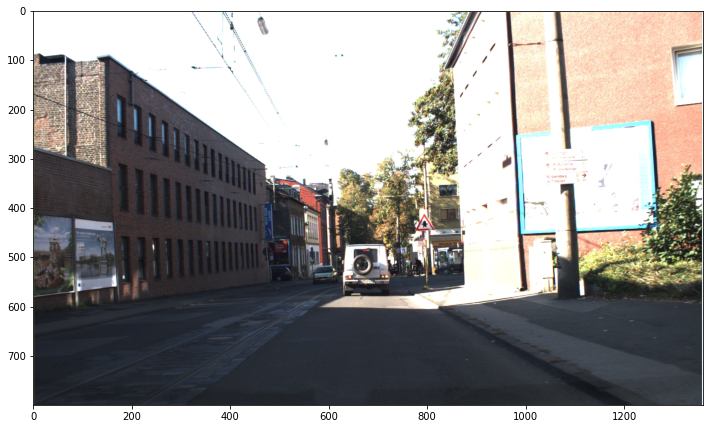

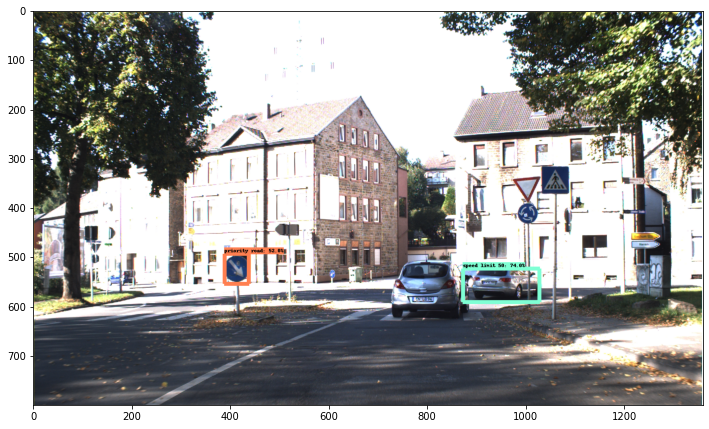

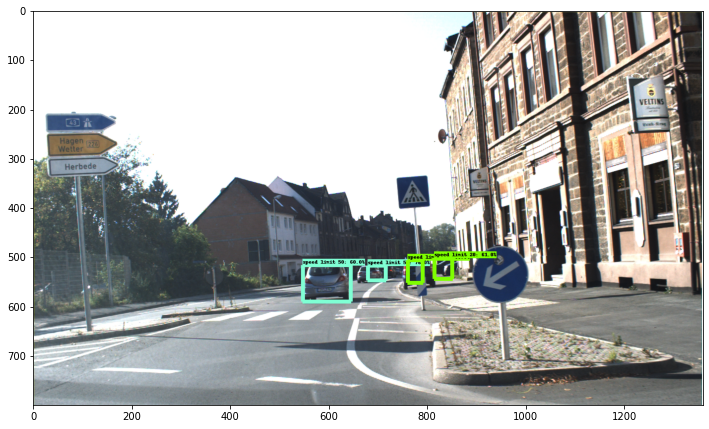

In [16]:
# import
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

#if tf.__version__ != '1.4.0':
#    raise ImportError('Please upgrade your tensorflow installation to v1.4.0!')

# Enviroment set up
# This is needed to display the images.
%matplotlib inline

# 如果发现无法找到object_detection，则进行下面的code进行路径加载，或者启动notebook时，能指定到
# This is needed since the notebook is stored in the object_detection folder.
# sys.path.append("..")

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util


# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_CKPT = './model_pb/rfcn/frozen_inference_graph.pb'
PATH_TO_CKPT = '/home/wilson/workstation/tensorflow/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'
data_dir = './data'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(data_dir, 'gtsdb.pbtxt')

#PATH_TO_LABELS = os.path.join(data_dir, 'object-detection.pbtxt')

NUM_CLASSES = 43

# Load model
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
    
# Loading label map 
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
              (im_height, im_width, 3)).astype(np.uint8)


# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
#PATH_TO_TEST_IMAGES_DIR = os.path.join(data_dir, 'TestIJCNN2013')
PATH_TO_TEST_IMAGES_DIR = os.path.join(data_dir, 'test_samples')
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '0000{}.png'.format(i)) for i in range(0, 3) ]
#TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(1, 2) ]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


with detection_graph.as_default():
  with tf.compat.v1.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
        print("正在处理图片：", image_path)
        image = Image.open(image_path)
        # the array based representation of the image will be used later in order to prepare the
        # result image with boxes and labels on it.
        image_np = load_image_into_numpy_array(image)
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
        # Actual detection.
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        # Visualization of the results of a detection.
        print(scores,classes)
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8)
        plt.figure(figsize=IMAGE_SIZE)
        plt.imshow(image_np)
    
print('Done.')

In [28]:
#coding:utf-8
"""
使用说明:
    输入输出:
        1. 读取test_images里面的文件进行推理,输出到output/TSD-Signal-Result-Cargo目录
        2. test_images下的图片位置为TSD-Signal-**/*.png
        3. 输出xml的文件名就是上面图片的目录名TSD-Signal-**
        4. 所有路径指定在页面底部.
    功能:
        1. 得到推理结果xml,用于提交
        2. 得到推理结果图片,用于调试
        3. 得到F1等统计结果,用于调试

"""
import os
import sys
import cv2
import glob
import shutil
import configparser
import numpy as np
import tensorflow as tf

from tqdm import tqdm
import sklearn
#from f1_score import Score
#from write_xml import build_xml
from PIL import ImageFont, ImageDraw, Image

#######################################################
# 获取标签名列对应列表
def get_label_dict(label_path):
    label_map_dict = {}
    label_list = []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.split():
                continue
            line = line.strip()
            number, name = line.split(' ', 1)
            label_map_dict[name] = int(number)
            label_list.append(name)
            assert len(label_list) == int(number), str(label_list) + ' ' + number
    # assert len(label_map_dict) == 77
    return label_map_dict, label_list

def to_image_coords(boxes, height, width):
    box_coords = np.zeros_like(boxes)
    box_coords[:, 1] = boxes[:, 0] * height
    box_coords[:, 0] = boxes[:, 1] * width
    box_coords[:, 3] = boxes[:, 2] * height
    box_coords[:, 2] = boxes[:, 3] * width
    return box_coords

def draw_box_and_text(image, box, label, pred_score, font_size, font):
    pt1 = (int(box[0]), int(box[1]))
    pt2 = (int(box[2]), int(box[3]))
    # bounding object
    cv2.rectangle(image, pt1, pt2, (255, 0, 0), 2)
    # label text and box
    label_text = "{}: {:.1f}%".format(label, pred_score*100)
    label_w, label_h= int(14.5*len(label_text)+4), font_size+4
    label_start = (pt2[0], pt1[1])
    # TODO: 多标签重叠处理
    # 如果x标签超出了最右边：
    #   如果y标签不会超出最上边，移动到上面显示
    #   如果y超出了最上面，移动到下面显示
    if label_start[0] + label_w > image.shape[1]:
        if label_start[1] - label_h > 0:
            shift = (- label_w, - label_h - 1)
        else:
            shift = (- label_w, pt2[1]-pt1[1] + 2)
        label_start = (label_start[0] + shift[0], label_start[1] + shift[1])

    label_end = (label_start[0] + label_w, label_start[1] + label_h)
    cv2.rectangle(image, label_start, label_end, (0, 255, 0), -1)
    
    # 转换为PIL写入中文后再转为cv2
    cv2_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2和PIL中颜色的hex码的储存顺序不同
    pil_im = Image.fromarray(cv2_im)
    drawObject = ImageDraw.Draw(pil_im) 
    drawObject.text((label_start[0] + 2, label_start[1] + 2), label_text,"red", font=font)
    image = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)    
    return image

# 非极大值抑制 from: http://blog.csdn.net/gan_player/article/details/78204960
def py_cpu_nms(dets, thresh):
    """Pure Python NMS baseline."""
    if len(dets) == 0:
        return []
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]
    
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    #从大到小排列，取index
    order = scores.argsort()[::-1]  #逆序排序
    #keep为最后保留的边框
    keep = []
    while order.size > 0:
        #order[0]是当前分数最大的窗口，之前没有被过滤掉，肯定是要保留的
        i = order[0]
        keep.append(i)

        #计算窗口i与其他所以窗口的交叠部分的面积，矩阵计算
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        #交/并得到iou值
        ovr = inter / (areas[i] + areas[order[1:]] - inter)
        #ind为所有与窗口i的iou值小于threshold值的窗口的index，其他窗口此次都被窗口i吸收
        inds = np.where(ovr <= thresh)[0]
        #下一次计算前要把窗口i去除，所有i对应的在order里的位置是0，所以剩下的加1
        order = order[inds + 1]
    return keep

#############################################
# 加载已训练好的模型快照
def load_graph():
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.compat.v1.GraphDef()
        with tf.io.gfile.GFile(pb_path, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return detection_graph

def main():
    #score = Score(GT_xmls_dir)   
    cf = configparser.ConfigParser()
    cf.read('./config/traffic.config')    
    font_size = 20
    font = ImageFont.truetype(cf.get('font_path', 'Simsun'), font_size) 
    #font = ImageFont.truetype('FreeSerif.ttf', font_size)
    
    # 加载标签名对应关系
    label_id_map_name, label_list = get_label_dict(label_path)
    
    # 加载已训练好的模型快照
    detection_graph = load_graph()
    
    with detection_graph.as_default():
        with tf.compat.v1.Session(graph=detection_graph) as sess:
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            ii = 0
              
            for image_name in os.listdir(img_dir):
            #for image_name in ['00000.png','00001.png','00002.png','00003.png','00004.png','00005.png','00006.png','00007.png','00008.png','00009.png']:
                image_path = os.path.join(img_dir, image_name)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # TODO
                (im_height, im_width, _) = image.shape
                image_np_expanded = np.expand_dims(image, axis=0)
                (boxes, scores, classes, num) = sess.run(
                        [detection_boxes, detection_scores, detection_classes, num_detections],
                        feed_dict={image_tensor: image_np_expanded})
                box_coords = to_image_coords(boxes[0], im_height, im_width)
                
                # 获得符合最低置信度的预测结果
                pred_idx = []
                for i, pred in enumerate(scores[0]):
                    if pred > pred_threshold:
                        pred_idx.append([i, pred])

                targets = []
                dets = []
                for idx, pred in pred_idx:
                    clazz = int(classes[0][idx:idx+1][0])
                    label = label_list[clazz-1]   
                    box = box_coords[idx:idx+1][0]
                    targets.append([label, box, pred])
                    dets.append([box[0], box[1], box[2], box[3], pred])
                dets = np.array(dets)
                    
                # 非极大值抑制
                y = py_cpu_nms(dets, 0.3)
                a = len(targets) - len(y)
                if a > 0: print('NMS Droped: ', a)
                targets = [targets[i] for i in y]
                # 写入结果框到image
                for label, box, pred in targets:
                    image = draw_box_and_text(image, box, label, pred, font_size, font)
                    
                # 计算score
                # is_pass = score.update(image_name, img_dir, targets)
                    
                # 生成结果图片 正确的和错误的分开保存
                #if is_gen_img:
                #    if not is_pass: # TODO : 真值 box和type写入
                #        cv2.imwrite(os.path.join(fail_case_dir, image_name), image)                        
                #    else:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(os.path.join(img_result_dir, image_name), image)
    return 0

data_dir = './data'
output_dir = './output'
test_dir = os.path.join(data_dir, 'test_samples')
img_dir = test_dir
label_path = os.path.join(data_dir,'gtsdb.label')
img_result_dir = os.path.join(output_dir, 'test_result')

#pb_path = './model_pb/rfcn/frozen_inference_graph.pb'
#pb_path = './model_pb/rcnn_resnet50/frozen_inference_graph.pb'
pb_path = '/home/wilson/workstation/tensorflow/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'

pred_threshold = 0.3

# 是否生成带框的结果图片
is_gen_img = True


if __name__ == '__main__':
    if os.path.exists(img_result_dir):
        shutil.rmtree(img_result_dir)
    os.makedirs(img_result_dir)    
    
    main()
    '''
    f1, precision, recall = score.get_f1_score() 

    acc, total = score.get_combine_accuracy()
    box_acc = score.get_box_accuracy()

    print(score.TP, score.FP, score.box_TP, score.box_FP)

    #print("F1 score: %.2f, precision: %.2f, recall: %.2f" %(f1, precision, recall))
    print('Total: ', total, ", Accuracy: ", format(acc,'0.1%'))
    print("box_acc: ", format(box_acc,'0.1%'))
    print("box match but type not match count: ", score.type_missed_count)

    '''
    print("Done")


NMS Droped:  4
NMS Droped:  1
Done
